<hr style="height:0px; visibility:hidden;" />

<h1><center><b>GL4U: Introduction<b></center></h1>

<h1><center>3. R Introduction</center></h1>

<div class="alert alert-block alert-success">
There are several commonly used bioinformatics programs built in R, including the tools we will use to process data in the <a href="https://github.com/nasa/GeneLab-Training/tree/main/GL4U">GL4U</a>  'omics-specific module sets. So here we are going to develop a little foundation for working in R. Just like with Unix, none of this is about memorization. R in particular can become a little messy looking if we aren't yet used to it, so don't worry if things seem a little confusing. This is just about exposure for now. 🙂
</div>

---

<center>This is notebook 3
of 4 of GL4U's Introduction Module Set. It is expected that the previous notebooks have been completed already.</center>

---

[**Previous:** 2. Unix intro](02-unix-intro.ipynb)
<br>

<div style="text-align: right"><a href="04-sequencing-data-QC.ipynb"><b>Next:</b> 4. Sequencing data QC</a></div>

---
---

# Table of Contents

* [0. What is R?](#0.-What-is-R?) 
* [1. Introduction to programming in R](#1.-Introduction-to-programming-in-R) 
  * [1a. Installing and loading packages/libraries in R](#1a.-Installing-and-loading-packages/libraries-in-R) 
  * [1b. Defining locations and assigning variables in R](#1b.-Defining-locations-and-assigning-variables-in-R) 
  * [1c. Loading and viewing a data file in R](#1c.-Loading-and-viewing-a-data-file-in-R) 
    * [help()](#help()) 
    * [read.table()](#read.table()) 
    * [head()](#head()) 
    * [dim()](#dim()) 
    * [summary()](#summary()) 
  * [1d. Data frame manipulations](#1d.-Data-frame-manipulations) 
    * [Add a value to all cells](#Add-a-value-to-all-cells) 
    * [Take the log of all cells](#Take-the-log-of-all-cells) 
    * [Convert data frame to contain only integers](#Convert-data-frame-to-contain-only-integers) 
    * [Slice a data frame column](#Slice-a-data-frame-column) 
    * [Slice a data frame row](#Slice-a-data-frame-row) 
    * [Filter data in a data frame](#Filter-data-in-a-data-frame) 
    * [Add columns to a data frame](#Add-columns-to-a-data-frame) 
    * [Combine data frames](#Combine-data-frames) 
  * [1e. Export data from R](#1e.-Export-data-from-R) 
  * [1f. Visualizations](#1f.-Visualizations) 
* [2. Using the Tidyverse](#2.-Using-the-Tidyverse) 
* [3. Final thought](#3.-Final-thought) 

<br>

---
---

<a class="anchor" id="zeroR"></a>

# 0. What is R?

R is a programming language designed specifically for statistical analysis and computing. R has many bioinformatic libraries (bundles of code made for performing specific tasks) for statistical analysis, as well as for data visualization. What really adds to the power of R is that it is a completely free and open-source project, and there is an enormous community of people all over the world that create these libraries of code for all of us to use.

---

<a class="anchor" id="oneR"></a>

# 1. Introduction to programming in R

Commands are more commonly called functions in R. The syntax of how these generally work in R looks like this: 

`function(arguments)`

Where the function name comes first and is followed by parentheses which would contain any arguments if they were needed. 

Even for functions that don't require any arguments, the function name still typically needs to be followed by parentheses so R knows to execute it. So running a function that doesn't need any arguments would look like this:

`function()`

<a class="anchor" id="lib"></a>

## 1a. Installing and loading packages/libraries in R

An R library, or package, is a collection of functions, compiled code, and sometimes data. Some R packages are installed automatically with the base R installation, but there are tens of thousands that are not. The most prominent repositories for R packages are the [Comprehensive R Archive Network (CRAN)](https://cran.r-project.org/web/packages/) and [Bioconductor](https://www.bioconductor.org/). 

If we want to use a package, we first may need to install it if we don't have it already. The typical way to install a package from the CRAN repository is with the `install.packages()` function. For example, the following is the syntax to install the BiocManager package, which is then itself used to install any package from the [Bioconductor](https://www.bioconductor.org/) suite.

`install.packages("BiocManager")`

<div class="alert alert-block alert-info">
    <b>Note</b>
    <br>
    You don't need to run any of the commands from this 1a section, they are just here as examples.
</div>


[Bioconductor](https://www.bioconductor.org/) packages including [DESeq2](https://www.bioconductor.org/packages/release/bioc/html/DESeq2.html), a leading program for differential gene-expression analysis, are installed using the BiocManager `install()` function (instead of the `install.packages()` function). Here is how we would install DESeq2:

`BiocManager::install("DESeq2")`


After a package is installed, we can access a function in it by starting with the package name, followed by 2 colons, and then using the function we want (as is done directly above). And sometimes we may want to do that in order to be explicit because sometimes different functions in different packages can actually have the same name. But often when we will be using many of the functions within a package it can be more convenient to load the package. We do this with the `library()` function as shown in the example below:

`library(DESeq2)`

And then we can just type out the function names without needing the package name in front of them.

---

<a class="anchor" id="variable"></a>

## 1b. Defining locations and assigning variables in R

#### getwd(), list.files(), and setwd()

The `getwd()` function in R stands for "get working directory". This function lists the current working directory, and is similar to the `pwd` command in Unix. 

The `list.files()` function is similar to the `ls` command in Unix. It will list the contents of the directory we provide, or the current working directory by default.

The `setwd()` function in R stands for "set working directory". This function allows us to change the current working directory, similar to the `cd` command in Unix.

Let's run `getwd()` in the next cell to print the current working directory. This particular function doesn't require any arguments.

In [ ]:
getwd()

Notice that the output of `getwd()` has quotation marks around it. That is because R is treating the path as a **string**, which is a one-dimensional array of characters that only represents the textual information contained between the quotation marks.

For example, 'Sally Ride was the first female American astronaut to go into space on June 18, 1983' is a string. 

In the next cell, try running `setwd()` to change the current working directory to the `/workspace/GeneLab-Training/intro/R_intro` directory we made in the Unix Intro. Then, run `getwd()` to check if you were successful. 

<div class="alert alert-block alert-info">
    <b>Note</b>
    <br>
    Remember that R expects paths as <b>strings</b>, so be sure to pass your path to <code>setwd()</code> as a string.
</div>
 

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

This will set the current working directory using an *absolute path* (which will work no matter where we are, so long as the directory exists):
    
`setwd("/workspace/GeneLab-Training/intro/R_intro")`

And this prints our current working directory:

`getwd()`

</details>
</div>

#### Assigning variables in R

In most programming languages, including R, we use **variables** to store information. Variables are named objects which refer to data stored in memory. In R, we use the `<-` operator to assign information to a variable. Remember that it is very important to choose informative, memorable, and short variable names.

For example, in the next cell, we are going to use the variable `x` to refer to the result of the equation `2 + 4`.

In [ ]:
x <- 2 + 4

We can access the data stored in the variable `x` by executing the variable name by itself:

In [ ]:
x

We can use variables to hold paths to locations so that we don't have to type out the path every time. Run the cell below to assign the path to the R_intro directory to the `workDir` variable. We chose the `workDir` variable as a short representation of the phrase "working directory".

In [ ]:
workDir <- '/workspace/GeneLab-Training/intro/R_intro'

Use the next cell to print the content of the `workDir` variable. Did you assign your variable successfully?

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

Running just the variable name will print out its contents:

`workDir`

</details>
</div>

We can also use variables to store large amounts of data, such as assigning data within a matrix to a variable as you'll see in the next section.

<div class="alert alert-block alert-warning">
<center><b>WARNING</b></center>
Never name your variable after a common function or a built-in variable in R. For a list of built-in R functions and variables, see "Appendix D Function and variable index" of the <a href="https://cran.r-project.org/doc/manuals/r-release/R-intro.pdf">R manual (pdf)</a>.
</div>



---

<a class="anchor" id="file"></a>

## 1c. Loading and viewing a data file in R

To begin working with a data file in R, we first have to load (aka read in) the file. How we load in a data file will depend on the file type and how the data are structured within it. R has several built-in functions for reading in common file types, including .csv (comma-separated values) files and .tsv (tab-separated-values) files.

In this tutorial, we are going to read in a .csv file.

Here is what our "example.csv" file looks like in plain-text, where we can see it has comma-separated values:

<center>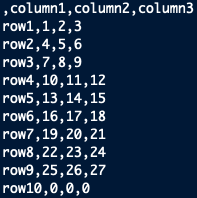</center>
<br>


And here it is in spreadsheet form, where we can also more clearly see it has column names (a header) and row names:

<center>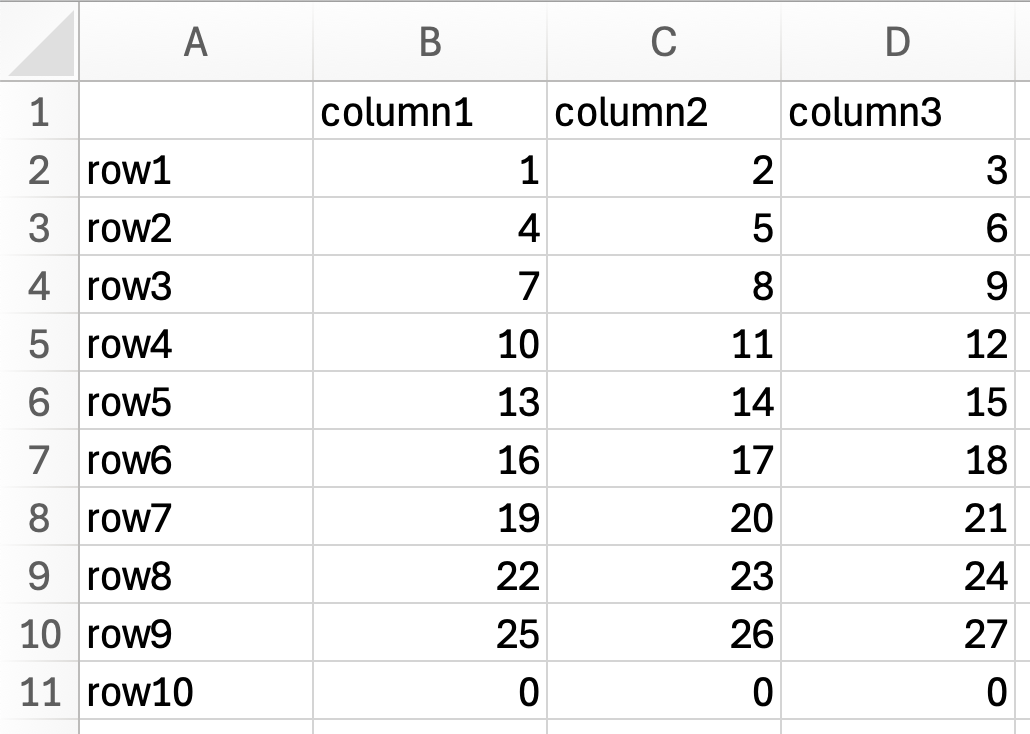</center>

<br>

To read this file into R, we will use a function called `read.table()`. This function will create a data frame, which is a very common data structure in R that is similar to a matrix. 

<a class="anchor" id="help"></a>
#### help()

Before reading in the .csv file, we'll use the `help()` function in R to look at the arguments available for the `read.table()` function. This is similar to the `--help` option that's available in many Unix commands.

<div class="alert alert-block alert-info">
<b>Note</b>
<br>
    
There is a lot of information in the output from the following <code>help()</code> menu. Often reading data into R is something we will try with the settings we think are appropriate, then check what was read in, then try again as we figure out exactly which arguments are needed for our particular data to be read in properly.

After running the following cell, scan through the help menu and pay particular attention to `header`, `sep`, and `row.names`, as those are relevant to the example data we are going to use. But don't worry about reading *everything* in there.

After looking at the help information, since it is so long we may want to collapse it when we aren't looking at it. To collapse it, you can select the output block, and then click the vertical blue bar to its left. It will shrink to 3 dots, which can then be clicked to re-open it.

</div>


In [ ]:
help(read.table)

**?COMMAND**

In addition to the help() function, you can also pull up the help menu for a command or function in R by typing a `?` followed by the command or function. Run the code block below to bring up the help menu for the `read.table()` function again, but this time using the `?`:

In [ ]:
?read.table

<a class="anchor" id="read"></a>
#### read.table()

Typically, the default settings of `read.table()` will not all be suited to the particular file we are reading in, and we'll have to provide the function with a set of arguments that suit our data. Each possible argument within a function is separated by a `,`. The default arguments for `read.table()` are specified right near the top of the help menu, under "Usage", and include things like `header = FALSE` and `sep = ""` – two things we already know aren't correct for our use here based on looking at the images of our "example.csv" file above.

But let's see anyway what things look like if we just try to read the file in without any arguments other than specifying the file name (which is a required argument). We'll store it in a variable called `myDF` (short for my data frame) by using the assignment operator (`<-`) just like when we've previously created variables:

In [ ]:
myDF <- read.table("example.csv")

And then we will print out the contents by running just the variable name:

In [ ]:
myDF

So that doesn't look right. Everything is all in one column, with no row names, and our column names are in the first row of data (R will add column names if it thinks there are none, like "V1" above).

Looking at the `help()` menu output above, under the "Arguments" section, here is what it notes for "sep":


> | | | 
> |---:|---|
> | `sep` | the field separator character. Values on each line of the file are separated by this character. If `sep = ""` (the default for `read.table`) the separator is ‘white space’, that is one or more spaces, tabs, newlines or carriage returns. |

So right now, it is trying to break apart the columns based on "white space".

Since we know our "example.csv" file has comma-separated values, let's add an argument for that, explicitly saying the separator is a comma, and then see how things look:

In [ ]:
myDF <- read.table("example.csv", sep = ",")

In [ ]:
myDF

Getting better. Now at least our columns are split apart properly. But our row names and columns names are currently not being treated as such, since alternate column names were added and the first one starts over our actual row names.

Here is part of what is noted for "row.names" under the "Arguments" section of the `help()` menu:

> | | | 
> |---:|---|
> | `row.names` | a vector of row names. This can be a vector giving the actual row names, or *a single number giving the column of the table which contains the row names*, or character string giving the name of the table column containing the row names. |

That may be a bit confusing if we're not used to reading these yet, but the key part is italicized above. 

What we want as row names is the first column in our file. Try modifying our last line (in the following cell) by adding the `row.names` argument specifying which column we want to be used as the row names (note that numbers should **not** be quoted like we do with "strings"):

In [ ]:
myDF <- read.table("example.csv", sep = ",",)

In [ ]:
myDF

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

In this case, since the column number that holds the row names we want is the first column, we can add `row.names = 1` to our comma-separated list of arguments inside the function parentheses:
    
`myDF <- read.table("example.csv", sep = ",", row.names = 1)`

Then we can print it out to see what it looks like:

`myDF`

</details>
</div>


Once we add that, all that seems left is our column names are still not being used as the header. Here is part of what the `help()` menu says about "header" under the "Arguments" section:

> | | | 
> |---:|---|
> | `header` | a logical value indicating whether the file contains the names of the variables as its first line. |

A "logical value" means `TRUE` or `FALSE` (all caps, and deliberately **not** quoted like "strings" are, as these are special values in R). 

So here we are adding in the argument telling the program our input file does contain a header:

In [ ]:
myDF <- read.table("example.csv", sep = ",", row.names = 1, header = TRUE)

In [ ]:
myDF

And now our table in R looks similar to what we expect:

<center>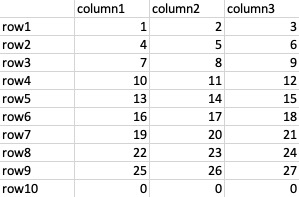</center>
<br>

Summarizing the arguments we added:
- `example.csv` - the path to the file we want to read in (which is just its name here because it is in our current working directory)
- `sep = ","` - specifying that a comma is what separates our columns
- `row.names = 1` – specifying that the first column of the file should serve as the row names 
- `header = TRUE` – specifying that the first line of the file is a header, or column names

It is common to do a little trial-and-error like this when reading in and writing out files in R and other languages. 

One more note on the input file location. As mentioned, since the `example.csv` file is in our current working directory, we were able to just provide the file name as the relative path for the computer to find it, like this:

`myDF <- read.table("example.csv", sep = ",", row.names = 1, header = TRUE)`

However, if the file were located in a directory other than the current working directory, we would have to explicitly convey the path to the directory that holds it. 

<a class="anchor" id="nest"></a>
#### Nest R functions

If the directory location of the file is held in a variable (as with the `workDir` variable we set in [section 1b](#1b.-Defining-locations-and-assigning-variables-in-R)), we could also use the function `file.path()` to construct the path to the file by combining the directory variable and the file name. The `file.path()` function will stick multiple arguments together, adding in the appropriate separator (like `/` for Unix or Mac systems, or `\` for Windows systems). 

For example, we could have read the same file in like this:

`myDF <- read.table(file.path(workDir, "example.csv"), sep = ",", row.names = 1, header = TRUE)`

We can run the cell below to see what the output of `file.path(workDir, "example.csv")` is producing:

In [ ]:
file.path(workDir, "example.csv")

So putting `file.path(...)` like in the above cell where the input file argument goes to the `read.table()` function is the same as typing out that full path ourselves and putting it there.

It's not uncommon to "nest" functions like this in R, where here the `file.path()` function is being called inside the `read.table()` function.

Let's run the following cell and start looking at our `myDF` object now.

In [ ]:
myDF



How many columns are in the `myDF` data frame?

How many rows?

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>
<br>

There are 3 columns and 10 rows.

</details>
</div>

<a class="anchor" id="headR"></a>
#### head()

Although in this example there is a manageable amount of data in `myDF`, in many cases viewing all the data may be unfeasible. Thus, similar to the `head` command in Unix, R also has a built-in function to view only a certain number of rows of a data frame or matrix, called `head()`. 

In the next cell, run `head()` and provide only one argument, the data frame variable.

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`head(myDF)`

</details>
</div>

How many lines are given by default with the `head()` command in R? Is this different from the number of lines given by default with the `head` command in Unix? 

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`head()` in R prints out 6 lines by default
    
Yes, the `head` command in Unix prints out 10 by default

</details>
</div>


We can also specify the number of lines we want to view by providing `head()` with another argument, e.g., `n = 3`:

In [ ]:
head(myDF, n = 3)

Use the next cell to print the first 8 rows of the `myDF` data frame.

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`head(myDF, n = 8)`
    
</details>
</div>

<a class="anchor" id="dim"></a>
#### dim()

R also has a function called `dim()` that will allow us to print the dimensions of the data frame without having to print any lines. 

In the next cell, use the `dim()` function to report the *dimensions*, or number of rows and columns, of the `myDF` data frame. 

In [ ]:
dim(myDF)

Is the row or column dimension reported first?

How many rows does `myDF` have? How many columns? 

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>
The number of rows is reported first.  

<br>

It reports 10 rows and 3 columns.

</details>
</div>

<a class="anchor" id="sumry"></a>
#### summary()

To get more information about a loaded data frame without having to print the entire thing, we can use the `summary()` function in R to print a mathematical summary. 

<div class="alert alert-block alert-info">
<b>Note</b>
<br>

`summary()` can also be used on many non-data frame objects.
</div>

Run the `summary()` function in the next cell to view a mathematical summary of the `myDF` data frame.

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`summary(myDF)`

</details>
</div>


Which column contains the highest median value in the data frame, `myDF`? 

Which column contains the highest overall value?

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

Column 3 contains the highest median value and the highest overall value.

</details>
</div>


---

<a class="anchor" id="df"></a>

## 1d. Data frame manipulations

Much of the data we work with in bioinformatics is in the data frame or matrix format. For example, gene expression data is usually held in matrix format, with samples as columns and genes as rows, where each entry (or cell) in the matrix contains the expression of a particular gene in a particular sample. 

When analyzing numerical data in table format, it can be useful to be able to perform mathematical functions on all cells in a data frame, such as adding a value to all cells or taking the log of all cells. Fortunately, R makes that easy for us to do. 

Below are some examples of common mathematical manipulations we often perform on data frames in bioinformatics.  

<a class="anchor" id="dfadd"></a>
#### Add a value to all cells

In R, you can add, subtract, multiply, or divide the number in every cell of a data frame by a specific value very easily. Run the command in the next cell to add `1` to every value in your `myDF` data frame.

In [ ]:
myDF + 1

Use the next cell to subtract 2 from all values in your `myDF` data frame.

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`myDF - 2`

</details>
</div>

<a class="anchor" id="dflog"></a>
#### Take the log of all cells

R also has a `log()` function that will allow you to take the log of all values in a data frame. By default, the `log()` function will calculate the [natural log](https://en.wikipedia.org/wiki/Natural_logarithm). However, you can specify which base you want to use by providing an optional argument, such as `base = 3`. There are also shortcut functions for commonly used bases, e.g.:

`log10()` will compute the common logarithm (base 10)

`log2()` will compute the binary logarithm (base 2)

Run the next cell to compute the natural logarithm of all values in your `myDF` data frame.

In [ ]:
log(myDF)

Use the next cell to compute the binary logarithm of all values in your `myDF` data frame.

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>
This could be done with the shortcut function:<br><br>

`log2(myDF)`

Or:<br>

`log(myDF, base = 2)`

</details>
</div>


<a class="anchor" id="dfint"></a>
#### Convert data frame to contain only integers

Some bioinformatics applications, such as DESeq2 which is commonly used for differential gene expression analysis, require that the input data contain only integers. There is a function in R called `ceiling()` that will round decimal values up to the nearest integer. 

Run the next cell to test the `ceiling()` function.

In [ ]:
ceiling(1.2)

Before we test this function on a data frame, we first have to create a data frame that contains decimal values. Note that although we did things like using the `log()` function to print the natural logarithm of all values in the `myDF` data frame above, those calculations were not saved in the `myDF` variable or anywhere else, we were just printing them out.

We can see the `myDF` variable still hasn't changed:


In [ ]:
myDF

To save these changes, we can assign them to a new variable. In the following cell, we will subtract 0.3 from all values in the `myDF` data frame and assign the new object to the variable `myDFsub`:

In [ ]:
myDFsub <- myDF - 0.3

In [ ]:
myDFsub

Now that we have a `myDFsub` data frame which contains decimal values, use the `ceiling()` function to round all the values in `myDFsub` up to the nearest integer, and assign it to a new variable called `myDFceil` in the cell below:

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`myDFceil <- ceiling(myDFsub)`

</details>
</div>


In the next cell, print the data held in the `myDFceil` variable. How have the data changed from what's in the `myDFsub` variable?

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>
    
`myDFceil`

They have all been rounded up to the nearest integer.

</details>
</div>


<a class="anchor" id="dfcol"></a>
#### Slice a data frame column

When analyzing bioinformatics data, you may need to extract only one column from a data frame. One way we can subset a data frame based on column names is to use the bracket `[` operator. This type of operation is also referred to as "slicing" the data frame. 

Run the cell below to slice `column1` of the `myDFceil` data frame.

In [ ]:
myDFceil['column1']

**Challenge:** In the next cell, try subsetting `myDFceil` to "column2", but only view the first 3 rows of the output using `head()` (*Hint*: Recall we can "nest" functions in R like we went over [above](#Nest-R-functions)).

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>
    
`head(myDFceil['column2'], n = 3)`

</details>
</div>

<a class="anchor" id="dfrow"></a>
#### Slice a data frame row

To subset a data frame based on row names, we again use the bracket `[` operator, but we need to add a comma after the row we want (explained next).

Run the cell below to slice `row1` of the `myDFceil` data frame:

In [ ]:
myDFceil['row1', ]

Within those `[]` brackets following a 2-dimentional object like the data frame we are using here, if we specify just **one** thing like we did above when providing a column name:

`myDFceil['column1']`

R will use that one piece of information and act on columns.

If we provide a comma in the subsetting brackets, such that we are specifying **two** things, it expects the **value preceding the comma to specify the rows** we want (like we did above with 'row1'), and the **value after the comma to specify the columns** we want. 

So within the subsetting brackets we are specifying `[ rows, columns ]`.

When we leave one of those blank, like in this example leaving the columns entry empty:

`myDFceil['row1', ]`

R will assume we want all of the columns.

There are multiple ways we can specify which rows or columns we want, including by name like we did above, but we can also pass TRUE/FALSE vectors, as we'll see next.

<a class="anchor" id="dffilter"></a>
#### Filter data in a data frame 

When analyzing bioinformatics data, we often need to filter the data to reduce noise. A common filtering method is to remove rows that have all zero values. To do this, we will remove all rows whose values sum to zero using a function called `rowSums()` inside our subsetting brackets `[]`.

First let's calculate the sum of each row in the `myDFceil` data frame using the `rowSums()` function:

In [ ]:
rowSums(myDFceil)

Next, we'll use the greater than mathematical operator, `>`, to identify which rows have sums greater than zero:

In [ ]:
rowSums(myDFceil) > 0

This is what's known as a "named logical vector", which is just a list of TRUE/FALSE values that happen to have names associated with them from the row names of the table.

We can see this by wrapping that in the `str()` function, which is a function that tells us some information about an object:

In [ ]:
str(rowSums(myDFceil) > 0)

As mentioned above, when specifying which rows or columns we want inside our subsetting brackets `[]`, we can provide a list of TRUE/FALSE values (a vector), and wherever there is a FALSE, that row will be removed.

So we can put the expression `rowSums(myDFceil) > 0` in the bracket `[]` location that specifies which rows we want (remember the position in front of the comma is for rows, and the position after the comma is for columns), and it will filter out the rows where that expression resolves to FALSE: 

In [ ]:
myDFceil[rowSums(myDFceil) > 0, ]

R is converting the expression `rowSums(myDFceil) > 0` into a TRUE/FALSE vector, and then only returning the rows where the vector holds a value of TRUE (which here is everything except row10, which was dropped).

In the next cell, use what you've just learned to remove all rows in `myDFceil` whose sum is less than 20:

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`myDFceil[ rowSums(myDFceil) < 20, ]`

</details>
</div>


Which rows remain after filtering by those whose row sums are less than 20?

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

Rows 1, 2, and 10.

</details>
</div>

<a class="anchor" id="dfmore"></a>
#### Add columns to a data frame

When working with data frames, it may sometimes be useful to add a column. To add a column to a data frame, we use the `[` bracket operator to specify the column we want to add or access, and use the assignment operator (`<-`) to assign new values there. If the column exists, it will change it. If it doesn't exist, it will create it.

To create a list of values in R, we use the `c()` function, which is a method that combines all its arguments to form a vector, or list.

Run the next cell to add a 4th column to your `myDFceil` data frame, then print the revised data frame, `myDFceil` (*note*: When there are two lines in a cell like below, they will just run one after another).

In [ ]:
myDFceil['column4'] <- c(1,2,3,4,5,6,7,8,9,10)
myDFceil

Use the next cell to add a 5th column of numbers to the `myDFceil` data frame, then print the modified data frame. Note that not just any vector will work. It needs to either be the same length as the number of rows in the data frame, 10 here, or it needs to have a length that is a multiple of the number of rows, like 2 or 5 here – in which case it will be duplicated to fill all rows.

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

Here is one way this could be done:

`myDFceil['column5'] <- c(2,4,6,8,10,12,14,16,18,20)`

Another could be:

`myDFceil['column5'] <- c(1,2)`


    
</details>
</div>

<a class="anchor" id="dfcombine"></a>
#### Combine data frames

Sometimes in bioinformatics, we have two (or more) data frames that we want to combine into one data frame. One way we can do this is with the R function `cbind()`. `cbind()` requires at least two arguments: the names of the two data frames that need to be combined.

Here we'll combine the original `myDF` with `myDFceil`:

In [ ]:
cbind(myDF, myDFceil)

<div class="alert alert-block alert-info">
<b>Note</b>
<br>
Notice that there is no check that column names will remain unique when using <code>cbind()</code>.
</div>

Now, instead of merely printing the combined data frame, use the next cell to create a variable called `combinedDF` that holds the combined data frame (remember the assignment operator, `<-`). We suggest `combinedDF` as a short representation of the phrase "combined data frame".

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`combinedDF <- cbind(myDF, myDFceil)`

</details>
</div>

What are the dimensions of the `combinedDF` data frame? *Hint*: use the `dim()` function in the cell below.

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`dim(combinedDF)`
    
The dimensions will likely be 10 rows and 8 columns, but they might be different if anything above changed while trying things, and that's okay!

</details>
</div>

Did `cbind()` merge these data frames on the row dimension or the column dimension? Why do you think that is? *Hint*: you can take a look at the `cbind()` documentation using the `help()` function.

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

We can view the help menu for `cbind()` with:

`help(cbind)`

`cbind()` stands for "column" bind, and it joined the data frames on the column dimension.

</details>
</div>

---

<a class="anchor" id="export"></a>

## 1e. Export data from R

<a class="anchor" id="write"></a>

#### write.csv()

Thus far, we have manipulated data frame variables in R, but the altered data is only stored in memory until we export it. Just like we used `read.table()` with specific arguments to read in the file the way we expected, `write.table()` is a common function for writing out data frames, where we could specify things like what we want the separator to be between columns. 

There is also a helper function, `write.csv()` with default settings that are more suitable when we know we want to create a .csv, as is the case here. So we will use that.

The following arguments are needed (in this order) to execute the `write.csv()` function: 

* the data frame we want to write out
* the file name we want to write to

In the next cell, you will use `write.csv()` to export the `combinedDF` data frame to a file called `combinedDF.csv`.

In [ ]:
write.csv(combinedDF, 'combinedDF.csv')

List all files in your current directory using the `list.files()` function:

In [ ]:
list.files()

Do you see your `combinedDF.csv` file in your current directory?

---

<a class="anchor" id="viz"></a>

## 1f. Visualizations

<a class="anchor" id="plot"></a>

#### plot()

R has a basic built-in function for many common plot types called `plot()`. 

At its most basic, the function call is: `plot(x, y)`, where x and y are numeric vectors containing the (x,y) points for the plot.

Let's call `plot()` with the following parameters: 

* x = the values from myDF, column 1
* y = the values from myDF, column 3


We saw before that we can use the following syntax to extract just one column from a dataframe: 
`myDF['column1']`.  But recall that this produces a subset dataframe, not a vector of numbers. 

In [ ]:
myDF['column1']

If we need just the values from a column as a vector of numbers, we can use the following syntax: 

`myDF$column1`

<div class="alert alert-block alert-info">
<b>Note</b>
<br>

Note that the `$` needs to precede the column name we want as done above, in order to tell R which column to find in the `myDF` object.

</div>



In [ ]:
myDF$column1

Use this `$` syntax to specify "column1" and "column3" to be the two input arguments (e.g. x and y, respectively) to the `plot()` function:

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`plot(myDF$column1, myDF$column3)`

</details>
</div>

Let's see if we can make this plot more interesting. Let's look at the parameters for `plot()`:

In [ ]:
help(plot)

In the next few cells, recreate this plot but pass different values to the following 2 parameters: `type` and `col`. 

**Challenge:** Can you create a plot with both points and lines, colored purple? 

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`col = "purple"` will set the color to be purple and `type = "b"` sets the plotting type to be both points and lines.

`plot(myDF$column1, myDF$column3, type = "b", col = "purple")`

</details>
</div>

---

<a class="anchor" id="tidyverse"></a>

# 2. Using the Tidyverse

The [tidyverse](https://www.tidyverse.org/) is a collection of R packages for data science. It groups together several incredibly useful packages into just one for us to install and load. There is lots [to learn](https://www.tidyverse.org/learn/) about the tidyverse, but here we are just going to look at two things: how we can “pipe” commands together, and how we can filter or subset tables in a way that's often more intuitive for some people than the base-R implementation we started with above.

If we needed to install the tidyverse package, we could do so with the following command:

`install.packages("tidyverse")`

And we need to load it by running this cell: 
> _Note: You will likely see a warning message regarding conflicting packages. You can ignore these._

In [ ]:
library(tidyverse)

We’ll be using an example dataset that comes built-in with R, stored in an object called `iris`. This is a data frame that contains various measurements of 3 different species of flowers. Let's look at it with some of our exploratory functions like we've seen above, starting with `head()` here:

In [ ]:
head(iris)

In the next two cells, try running `dim()` and `summary()` on the `iris` object:

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`dim(iris)`

`summary(iris)`

</details>
</div>

From the output of the `summary()` function, how many of each species are there in the table?

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

There are 50 of each species.

</details>
</div>

Let’s say we wanted to subset down to only include rows where the Sepal.Length was fewer than 4.5 (these measurements are in centimeters). One way we could do this with base R, like we covered above, would be this:

In [ ]:
iris[iris["Sepal.Length"] < 4.5, ]

As a reminder of what is happening here:
- our starting object is `iris`, followed by our subsetting brackets `[]`
- the first position of the subsetting brackets (which is where we declare what rows we want) contains `iris["Sepal.Length"] < 4.5`, which will become a TRUE/FALSE vector, and only the rows that resolve to TRUE will be kept
- after the comma, at the second position of the subsetting brackets (where we specify which columns we want), we have nothing, which is how we indicate we want all columns

This is all fine, and it gets the job done. but it can be a little tricky to read, and it's the simplest case of how we might want to filter. If we want to filter in multiple ways, that method can become pretty messy looking.

Here is how we can do the same filtering using tidyverse methods:

In [ ]:
iris %>% filter(Sepal.Length < 4.5)

That could be read as something like "send the `iris` object into the `filter()` function, and filter based on this expression".

We've introduced two new concepts there:
1. the "pipe" `%>%` operator, which works similar to the Unix pipe `|` and allows us to stick objects and functions together in a linear, often more intuitive fashion 
2. the `filter()` function that comes packaged with tidyverse 

If we want to filter on multiple columns, we can provide them as a list separated by commas within the `filter()` function. 

Here is if we want to filter based on Sepal.Length > 6 and Species being "versicolor".

In [ ]:
iris %>% filter(Sepal.Length > 6, Species == "versicolor")

<div class="alert alert-block alert-info">
<b>Note</b>
<br>
Notice that when we want a column value to equal something in order to be retained, we need to use two equal signs, <code>==</code>. In R, one equal sign is used for assigning values and setting argument values, while two equal signs are used for checking equality.
</div>

In the next cell, modify our line from above by adding another filtering parameter into the `filter()` function to also filter by `Petal.Length >= 4.8`:

In [ ]:
iris %>% filter(Sepal.Length > 6, Species == "versicolor")

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

`iris %>% filter(Sepal.Length > 6, Species == "versicolor", Petal.Length >= 4.8)`

</details>
</div>

How many rows are left after filtering on those 3 criteria?

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

4

</details>
</div>


Here's one of the ways that would be done with base R:

In [ ]:
iris[iris["Sepal.Length"] > 6 & iris["Species"] == "versicolor" & iris["Petal.Length"] >= 4.8, ]

And that's before adding in filtering out based on any columns we may want!

The `select()` function let's us choose which columns we want. To use it, we put the name(s) of the column(s) we want to keep inside it (not quoted).

Here is an example just selecting the Sepal.Length and Species columns ("piped" into head to keep the output to only the first 6 rows):

In [ ]:
iris %>% select(Sepal.Length, Species) %>% head()

Based on what we covered above, in the next cell, try to use the `%>%` operator and the `filter()` and `select()` functions to filter the `iris` dataset based on:
- Sepal.Width being greater or equal to 3.5
- Petal.Width being greater than 2
- only keep the columns Sepal.Width and Species

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

This is one way to do it:

`iris %>% filter(Sepal.Width >= 3.5, Petal.Width > 2) %>% select(Sepal.Width, Species)`

</details>
</div>



How many rows are left based on those criteria? 

<div class="alert alert-block alert-success">

<details>
<summary><b>Solution</b></summary>

<br>

2

</details>
</div>


As with above, we are not changing the `iris` object when we do these operations. If we wanted to store the output to a new object, we would put the desired name of the new variable in front, followed by the assignment operator `<-`, like so:

In [ ]:
filtered_iris <- iris %>% filter(Sepal.Length > 7.6)

In [ ]:
filtered_iris

---

<a class="anchor" id="final-thought"></a>

# 3. Final thought

This was a very foundational introduction to R. R in particular can be a little confusing and not all that intuitive at first. Don't be intimidated if some code or a large codeblock looks like it makes no sense to you at first. That is common even for folks who use R regularly! It often takes breaking things down piece-by-piece to figure out what they are doing, and then putting them together slowly to do what we'd like. And many of us start with code from somewhere else first (whether it's from a previous project of our own, examples from a tutorial, or somewhere else), and then modify that code to eventually get it to do what we want. That is a typical process for many data scientists. 🙂

---
---

[**Previous:** 2. Unix intro](02-unix-intro.ipynb)
<br>

<div style="text-align: right"><a href="04-sequencing-data-QC.ipynb"><b>Next:</b> 4. Sequencing data QC</a></div>